In [6]:
import pandas as pd
import numpy as np

from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import MiniBatchKMeans

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

### Загружаем ембеддинги

In [3]:
embeddings_df = pd.read_csv('./embeddings_df.csv')

In [5]:
embeddings_df.head()

,emb_1,emb_2
0,0.862174,2.006177
1,0.526568,0.326797
2,0.862174,2.006177
3,1.288764,-1.368315
4,1.192892,0.312521


In [21]:
# Рассчитываем KMeans и считаем метрики ---> C ПОДСЧЕТОМ АКТИВНОСТИ
np.random.seed(42)
clusters_top = -1
top = 0
clusters_scores = []

for n_clusters in range(2,50):
    mbk = MiniBatchKMeans(init='k-means++', n_clusters=n_clusters, batch_size=300, n_init=n_clusters,random_state=42)
    cluster_labels = mbk.fit_predict(embeddings_df.values)

    calinski_harabasz = calinski_harabasz_score(embeddings_df.values, cluster_labels)
    clusters_scores.append(calinski_harabasz)
    
    if calinski_harabasz > top:
        top = calinski_harabasz
        clusters_top = n_clusters
    
    print(f"For n_clusters = {n_clusters}, The calinski_harabasz_score is :{calinski_harabasz}")

For n_clusters = 2, The calinski_harabasz_score is :812601.6819034199
For n_clusters = 3, The calinski_harabasz_score is :782324.3203978993
For n_clusters = 4, The calinski_harabasz_score is :1037160.8604454605
For n_clusters = 5, The calinski_harabasz_score is :1238938.365657005
For n_clusters = 6, The calinski_harabasz_score is :1390166.7629247932
For n_clusters = 7, The calinski_harabasz_score is :1492225.4428930506
For n_clusters = 8, The calinski_harabasz_score is :1629911.3720516965
For n_clusters = 9, The calinski_harabasz_score is :1892322.747350513
For n_clusters = 10, The calinski_harabasz_score is :2867192.957432452
For n_clusters = 11, The calinski_harabasz_score is :3478931.51490938
For n_clusters = 12, The calinski_harabasz_score is :4381392.8566047875
For n_clusters = 13, The calinski_harabasz_score is :5104873.043759011
For n_clusters = 14, The calinski_harabasz_score is :6255180.728368069
For n_clusters = 15, The calinski_harabasz_score is :8421890.903961746
For n_clus

In [22]:
print(f'top clusters_n = {clusters_top} with calinski_harabasz_score = {round(calinski_harabasz, 2)}')

top clusters_n = 25 with calinski_harabasz_score = 12769357.12


''

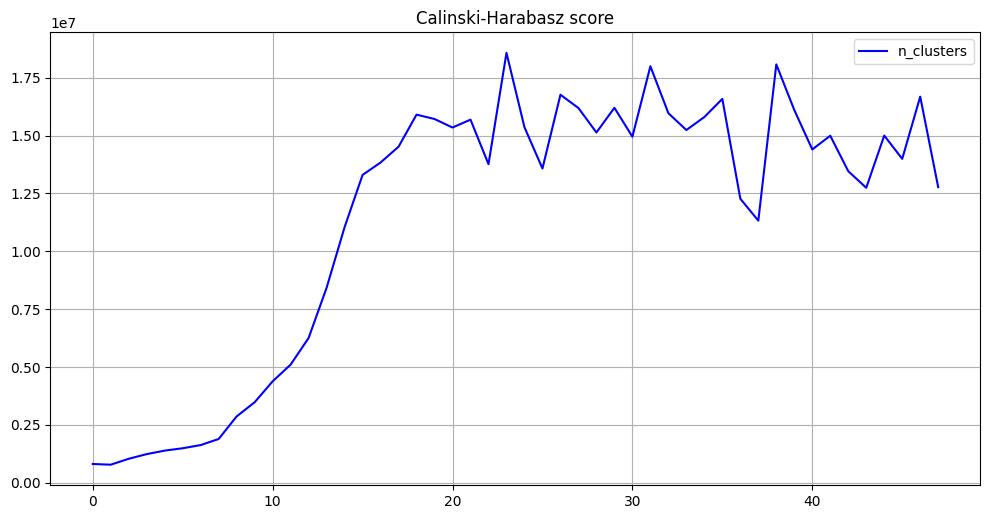

In [55]:
plt.figure(figsize=(12, 6), dpi=100)

plt.title('Calinski-Harabasz score')

plt.grid()
plt.plot(clusters_scores, color='blue')
plt.legend(['n_clusters'])
;

### Видим, что при 25 кластерах результаты наилучшие 

In [75]:
mbk = MiniBatchKMeans(init='k-means++', n_clusters=25, batch_size=300, n_init=25,random_state=42)

In [101]:
embeddings_df['cluster'] = mbk.fit_predict(embeddings_df[['emb_1', 'emb_2']].values)

In [208]:
def draw_clusters(clusterer, data):
    
    colors = ['red', 'green', 'blue', 'magenta',
              'gold', 'orange', 'teal', 'slategray',
              'pink', 'olivedrab', 'aqua', 'mediumpurple',
              'red', 'lightgray', 'lime', 'red',
              'orange', 'tomato', 'cyan', 'royalblue',
              'wheat', 'darkorchid', 'chocolate', 'lime','yellow']
    
    centers = clusterer.cluster_centers_
    plt.figure(figsize=(12, 6), dpi=100)
    
    for cl in range(clusterer.n_clusters):
        
        tmp = data[data['cluster']==cl] 
        cluster_color = colors[cl]
        plt.scatter(tmp['emb_1'],
                    tmp['emb_2'],
                    s=2,
                    c=cluster_color)
    
    plt.scatter(centers[:,0],
                centers[:,1],
                c='black')
    plt.show()    

In [206]:
# index = np.random.choice(embeddings_df.index, int(0.5*embeddings_df.shape[0]))
# light_df = embeddings_df.loc[index].reset_index()

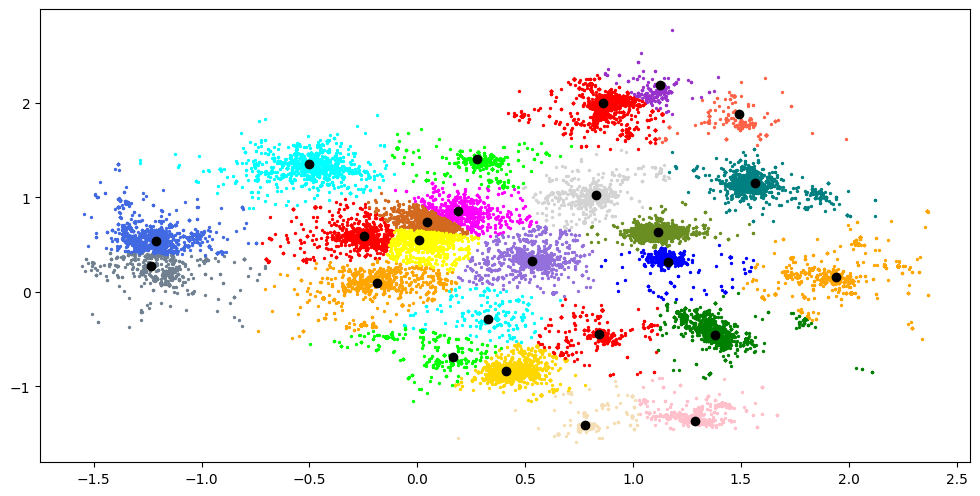

In [209]:
draw_clusters(mbk, embeddings_df)